# 词袋模型

In [2]:
import pandas as pd

# 导入数据
file_path = '/Users/huaaa/Desktop/text_analysis_twitter_sample.xlsx'
text_ana = pd.read_excel(file_path)
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana.head()  # 显示前几行，确认数据加载成功

,index,id,screen_name,time,link,text,source
0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"RT @Reuters MORE: Top U.S. general says, given...",Twitter for iPhone
1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,T-minus 2 days until our first-ever Last Best ...,Twitter Web Client
2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,Please know that help is available. Visit http...,Twitter Web Client
3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,Literally flying the wings off the A-10 in fig...,Twitter Web Client
4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,Today the House unanimously passed my bill #HR...,Twitter Web Client


In [75]:
import re

def preprocess_text(text):
    # 转换为小写
    text = text.lower()   

    # # 移除URL
    text = re.sub(r'http\S+', '', text)
    # # 移除特殊字符和数字
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # # 移除多余的空格
    text = re.sub(r'\s+', ' ', text).strip()
    # 移除停用词
    stop_words = set(['to', 'the', 'on', 'rt','of','in','for','and','with','amp','we','you','is','our','my','this','at','are','be','at','from','will','would','has','as','by','their', 'that', 'his', 'all', 'about', "it's", 'new', 'not'])
    # print(text)
    text = ' '.join([word for word in text.split() if word not in stop_words])  # 移除停用词
    # print(text)
    
    return text

In [77]:
text_ana["text"].apply(preprocess_text)

0      reuters more top us general says given challen...
1      tminus days until firstever last best outdoors...
2      please know help available visit or call samhs...
3      literally flying wings off a fight against isi...
4      today house unanimously passed bill hr which e...
                             ...                        
495    great conversation presidential historian mich...
496    icymi over weekend jeffflake teams up arizona ...
497    one americas most beautiful welcoming communit...
498    senatordurbin americans gun owners want backgr...
499    vvamerica forevergibill shows just how much ca...
Name: text, Length: 500, dtype: object

In [79]:
# len(text_ana)
text_ana.shape

(500, 7)

## 构建词袋模型

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out()[:100])

词袋特征矩阵的形状: (500, 3491)
特征词列表: ['aapis' 'abandoning' 'abandons' 'abell' 'abetterdeal' 'abilities'
 'ability' 'able' 'abominable' 'abortion' 'above' 'absolutely' 'abt'
 'abuses' 'aca' 'academy' 'accept' 'access' 'accessible' 'accomplished'
 'accomplishing' 'accomplishment' 'accomplishments' 'according' 'accords'
 'accountability' 'accountable' 'accusations' 'accused' 'aclu' 'across'
 'act' 'action' 'active' 'activemanagement' 'acts' 'actsavemoms' 'actual'
 'actually' 'ad' 'add' 'addiction' 'adding' 'additional' 'address' 'adl'
 'adldenver' 'admin' 'administration' 'admins' 'admiral' 'adoption'
 'adults' 'advance' 'advances' 'advancing' 'advantage'
 'advantagesdisadvantages' 'advise' 'advocacy' 'advocating' 'affected'
 'affecting' 'afford' 'affront' 'afghanistan' 'africa' 'african' 'after'
 'afternoon' 'ag' 'again' 'against' 'agatcountry' 'age' 'agencies'
 'agency' 'agenda' 'agents' 'aggressively' 'aglife' 'ago' 'agree'
 'agreements' 'agribusiness' 'agriculture' 'aguscipolicy' 'aha' 'ahea

In [84]:
len(vectorizer.get_feature_names_out())

3491

In [86]:
X

<500x3491 sparse matrix of type '<class 'numpy.int64'>'
	with 7486 stored elements in Compressed Sparse Row format>

In [88]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

## 词频统计

In [91]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()
feature_words.shape

(3491,)

In [93]:
X.sum(axis=0).A1

array([1, 1, 1, ..., 1, 2, 1])

In [95]:
list(zip(feature_words, X.sum(axis=0).A1))

[('aapis', 1),
 ('abandoning', 1),
 ('abandons', 1),
 ('abell', 1),
 ('abetterdeal', 4),
 ('abilities', 1),
 ('ability', 1),
 ('able', 1),
 ('abominable', 1),
 ('abortion', 1),
 ('above', 1),
 ('absolutely', 2),
 ('abt', 3),
 ('abuses', 1),
 ('aca', 4),
 ('academy', 3),
 ('accept', 1),
 ('access', 4),
 ('accessible', 1),
 ('accomplished', 2),
 ('accomplishing', 1),
 ('accomplishment', 1),
 ('accomplishments', 1),
 ('according', 1),
 ('accords', 1),
 ('accountability', 1),
 ('accountable', 2),
 ('accusations', 1),
 ('accused', 1),
 ('aclu', 1),
 ('across', 4),
 ('act', 19),
 ('action', 6),
 ('active', 1),
 ('activemanagement', 1),
 ('acts', 2),
 ('actsavemoms', 2),
 ('actual', 1),
 ('actually', 2),
 ('ad', 1),
 ('add', 3),
 ('addiction', 1),
 ('adding', 1),
 ('additional', 1),
 ('address', 4),
 ('adl', 1),
 ('adldenver', 1),
 ('admin', 4),
 ('administration', 4),
 ('admins', 1),
 ('admiral', 1),
 ('adoption', 2),
 ('adults', 1),
 ('advance', 1),
 ('advances', 1),
 ('advancing', 1),
 ('a

In [97]:
# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))
word_freq

{'aapis': 1,
 'abandoning': 1,
 'abandons': 1,
 'abell': 1,
 'abetterdeal': 4,
 'abilities': 1,
 'ability': 1,
 'able': 1,
 'abominable': 1,
 'abortion': 1,
 'above': 1,
 'absolutely': 2,
 'abt': 3,
 'abuses': 1,
 'aca': 4,
 'academy': 3,
 'accept': 1,
 'access': 4,
 'accessible': 1,
 'accomplished': 2,
 'accomplishing': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'according': 1,
 'accords': 1,
 'accountability': 1,
 'accountable': 2,
 'accusations': 1,
 'accused': 1,
 'aclu': 1,
 'across': 4,
 'act': 19,
 'action': 6,
 'active': 1,
 'activemanagement': 1,
 'acts': 2,
 'actsavemoms': 2,
 'actual': 1,
 'actually': 2,
 'ad': 1,
 'add': 3,
 'addiction': 1,
 'adding': 1,
 'additional': 1,
 'address': 4,
 'adl': 1,
 'adldenver': 1,
 'admin': 4,
 'administration': 4,
 'admins': 1,
 'admiral': 1,
 'adoption': 2,
 'adults': 1,
 'advance': 1,
 'advances': 1,
 'advancing': 1,
 'advantage': 1,
 'advantagesdisadvantages': 1,
 'advise': 1,
 'advocacy': 1,
 'advocating': 1,
 'affected': 2,
 'af

In [99]:
word_freq.items()

dict_items([('aapis', 1), ('abandoning', 1), ('abandons', 1), ('abell', 1), ('abetterdeal', 4), ('abilities', 1), ('ability', 1), ('able', 1), ('abominable', 1), ('abortion', 1), ('above', 1), ('absolutely', 2), ('abt', 3), ('abuses', 1), ('aca', 4), ('academy', 3), ('accept', 1), ('access', 4), ('accessible', 1), ('accomplished', 2), ('accomplishing', 1), ('accomplishment', 1), ('accomplishments', 1), ('according', 1), ('accords', 1), ('accountability', 1), ('accountable', 2), ('accusations', 1), ('accused', 1), ('aclu', 1), ('across', 4), ('act', 19), ('action', 6), ('active', 1), ('activemanagement', 1), ('acts', 2), ('actsavemoms', 2), ('actual', 1), ('actually', 2), ('ad', 1), ('add', 3), ('addiction', 1), ('adding', 1), ('additional', 1), ('address', 4), ('adl', 1), ('adldenver', 1), ('admin', 4), ('administration', 4), ('admins', 1), ('admiral', 1), ('adoption', 2), ('adults', 1), ('advance', 1), ('advances', 1), ('advancing', 1), ('advantage', 1), ('advantagesdisadvantages', 1)

In [101]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('qt', 62),
 ('it', 43),
 ('have', 42),
 ('tax', 40),
 ('who', 38),
 ('trump', 35),
 ('us', 33),
 ('today', 32),
 ('your', 30),
 ('here', 29),
 ('an', 27),
 ('bill', 27),
 ('thank', 27),
 ('more', 26),
 ('get', 25),
 ('need', 25),
 ('must', 24),
 ('great', 23),
 ('help', 23),
 ('house', 23),
 ('im', 23),
 ('work', 23),
 ('health', 22),
 ('its', 22),
 ('was', 22),
 ('families', 21),
 ('he', 21),
 ('just', 21),
 ('people', 21),
 ('what', 21),
 ('americans', 20),
 ('day', 20),
 ('one', 20),
 ('support', 20),
 ('they', 20),
 ('up', 20),
 ('act', 19),
 ('congress', 19),
 ('if', 19),
 ('live', 19),
 ('now', 19),
 ('can', 18),
 ('care', 18),
 ('them', 18),
 ('am', 17),
 ('no', 17),
 ('working', 17),
 ('american', 16),
 ('been', 16),
 ('national', 16),
 ('out', 16),
 ('proud', 16),
 ('senate', 16),
 ('those', 16),
 ('do', 15),
 ('family', 15),
 ('me', 15),
 ('when', 15),
 ('against', 14),
 ('know', 14),
 ('rep', 14),
 ('watch', 14),
 ('back', 13),
 ('gop', 13),
 ('join', 13),
 ('keep', 13),
 

## 词云图

In [104]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


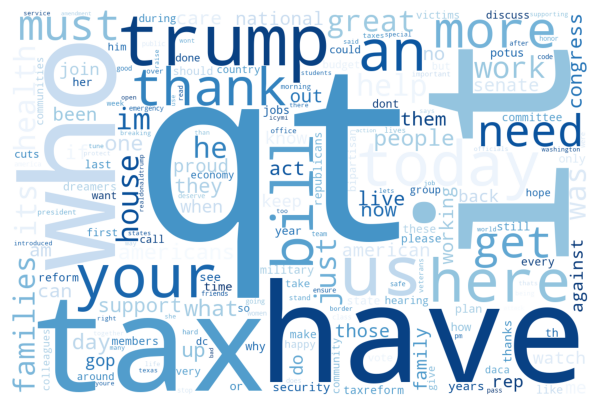

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, height=800
    , max_words=200
    # , max_font_size=100
    , colormap='Blues'
    , background_color='white'
    , font_path= None
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')
# plt.savefig('wordcloud_twi.png', dpi=100)
plt.show()